In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
profile = pd.read_csv('C:/Users/acerpc/Desktop/data_folder/profile_telecom.csv',skipinitialspace=True,encoding='utf8')
profile.head()

,ID,cnt_call,cnt_msg,cnt_wei,cnt_web
0,1964627,46,90,36,31
1,3107769,53,2,0,2
2,3686296,28,24,5,8
3,3961002,9,2,0,4
4,4174839,145,2,0,1


In [3]:
profile.describe()

,ID,cnt_call,cnt_msg,cnt_wei,cnt_web
count,6.000000e+02,600.000000,600.000000,600.000000,600.000000
mean,4.487454e+08,65.593333,17.758333,14.808333,8.880000
std,2.607005e+08,66.147692,19.642632,24.802221,10.634728
min,1.964627e+06,2.000000,2.000000,0.000000,0.000000
25%,2.145278e+08,22.000000,2.000000,0.000000,2.000000
50%,4.706097e+08,49.000000,11.000000,4.000000,5.000000
75%,6.797425e+08,87.250000,26.000000,19.000000,13.000000
max,8.735745e+08,729.000000,186.000000,162.000000,77.000000


In [4]:
profile.loc[:,'cnt_call':].corr(method='pearson')

,cnt_call,cnt_msg,cnt_wei,cnt_web
cnt_call,1.000000,0.052096,0.117832,0.114190
cnt_msg,0.052096,1.000000,0.510686,0.739506
cnt_wei,0.117832,0.510686,1.000000,0.950492
cnt_web,0.114190,0.739506,0.950492,1.000000


In [5]:
ss = StandardScaler()
scale_profile = ss.fit_transform(profile.loc[:,'cnt_call':])

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
pca = PCA(n_components=4)
pca.fit(scale_profile)
pca.explained_variance_ratio_

array([0.62510442, 0.24620209, 0.12735854, 0.00133495])

In [7]:
pca = PCA(n_components=2)
pca.fit(scale_profile)
pca.explained_variance_ratio_

array([0.62510442, 0.24620209])

In [8]:
pca.components_

array([[ 0.11085805,  0.50974123,  0.57909319,  0.62651852],
       [ 0.99020127, -0.12736724, -0.01900236, -0.05401806]])

In [9]:
pca_profile = pd.DataFrame(pca.transform(scale_profile),columns=["A","B"])
pca_profile.head()

,A,B
0,3.642864,-0.891070
1,-1.182101,-0.040078
2,-0.182031,-0.591736
3,-1.137980,-0.709455
4,-1.086750,1.343354


In [10]:
pca_data = pd.DataFrame(scale_profile,columns=profile.loc[:,'cnt_call':].columns).join(pca_profile)
pca_data.insert(0,'ID',profile.ID)
pca_data.head()

,ID,cnt_call,cnt_msg,cnt_wei,cnt_web,A,B
0,1964627,-0.296453,3.680868,0.855139,2.081714,3.642864,-0.891070
1,3107769,-0.190541,-0.802921,-0.597555,-0.647477,-1.182101,-0.040078
2,3686296,-0.568798,0.318026,-0.395792,-0.082817,-0.182031,-0.591736
3,3961002,-0.856274,-0.802921,-0.597555,-0.459257,-1.137980,-0.709455
4,4174839,1.201447,-0.802921,-0.597555,-0.741587,-1.086750,1.343354


In [11]:
#因子分析
from fa_kit import FactorAnalysis
from fa_kit import plotting as fa_plot
fa = FactorAnalysis.load_data_samples(scale_profile,preproc_demean=True,preproc_scale=True)
fa.extract_components()

In [12]:
fa.find_comps_to_retain(method='top_n',num_keep=2)


array([0, 1], dtype=int64)

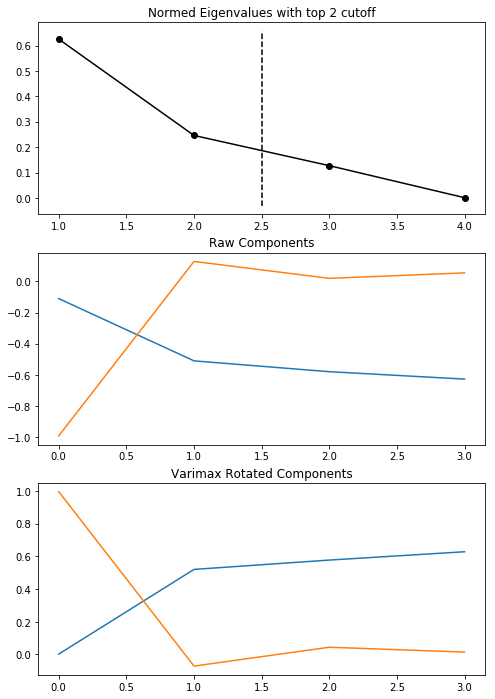

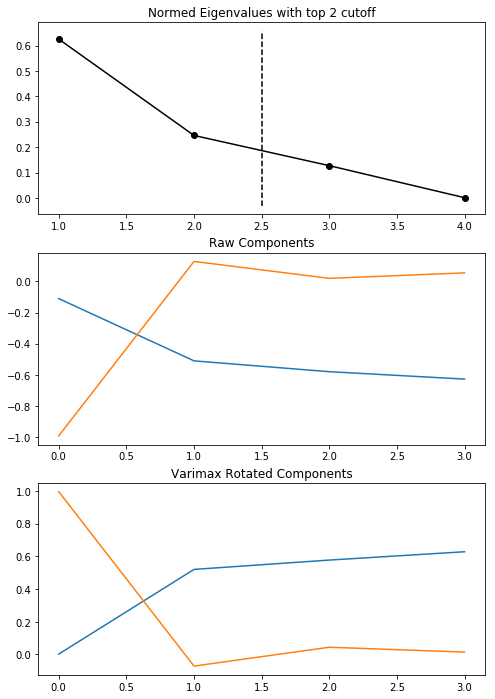

In [13]:
fa.rotate_components(method='varimax')
fa_plot.graph_summary(fa)

In [14]:
fa_comps = pd.DataFrame(fa.comps['rot'])
fa_comps.head()

,0,1
0,0.002284,0.996385
1,0.520586,-0.071056
2,0.577715,0.044221
3,0.628674,0.014582


In [15]:
fa_score = fa.get_component_scores(scale_profile)
fa_profile = pd.DataFrame(fa_score,columns=['A','B'])
fa_profile.head()

,A,B
0,3.718276,-0.488759
1,-1.170693,-0.168666
2,-0.116459,-0.608050
3,-1.053884,-0.829247
4,-1.226677,1.216917
